# Problem 1

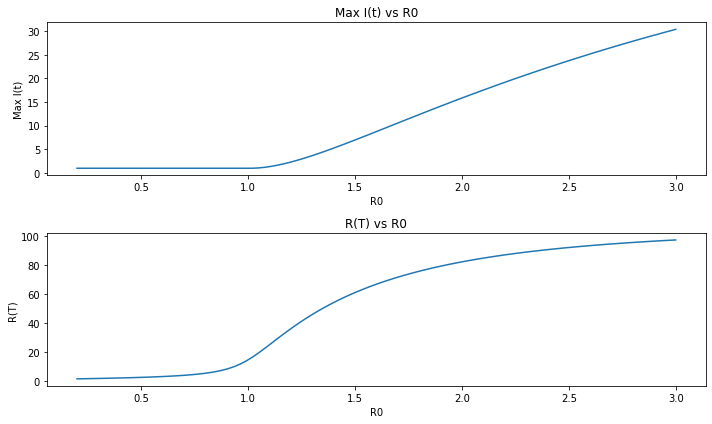

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 100
gamma = 1/14
T = 1000
t = np.linspace(0, T, T)

S0, I0, R0 = 99, 1, 0

R0_values = np.linspace(0.2, 3, 100)
max_I_values = []
R_T_values = []

for R0 in R0_values:
    beta = R0 * gamma
    ret = odeint(deriv, [S0, I0, R0], t, args=(N, beta, gamma))
    S, I, R = ret.T
    max_I_values.append(np.max(I))
    R_T_values.append(R[-1])

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(R0_values, max_I_values)
plt.title("Max I(t) vs R0")
plt.xlabel("R0")
plt.ylabel("Max I(t)")

plt.subplot(2, 1, 2)
plt.plot(R0_values, R_T_values)
plt.title("R(T) vs R0")
plt.xlabel("R0")
plt.ylabel("R(T)")

plt.tight_layout()
plt.show()


# Problem 2

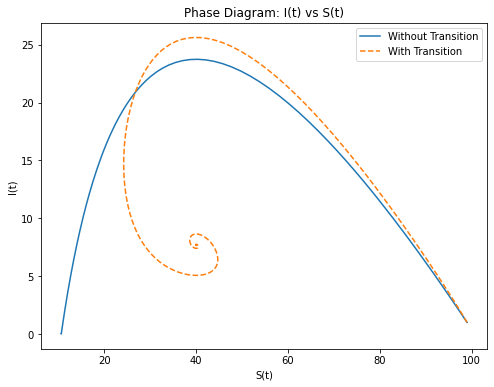

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def deriv_without(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def deriv_with(y, t, N, beta, gamma, eta):
    S, I, R = y
    dSdt = -beta * S * I / N + eta * R
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - eta * R
    return dSdt, dIdt, dRdt

N = 100
gamma = 1/14
eta = 0.01
T = 1000
t = np.linspace(0, T, T)

S0, I0, R0 = 99, 1, 0

R0 = 2.5  # Assumption
beta = R0 * gamma

ret_without = odeint(deriv_without, [S0, I0, R0], t, args=(N, beta, gamma))
S_without, I_without, R_without = ret_without.T

ret_with = odeint(deriv_with, [S0, I0, R0], t, args=(N, beta, gamma, eta))
S_with, I_with, R_with = ret_with.T

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(S_without, I_without, label='Without Transition')
plt.plot(S_with, I_with, '--', label='With Transition')
plt.title("Phase Diagram: I(t) vs S(t)")
plt.xlabel("S(t)")
plt.ylabel("I(t)")
plt.legend()
plt.show()
